In [1]:
import time
import tracemalloc
import matplotlib.pyplot as plt
from Environment import Environment, bruteForce, kDTree, sweepAndPrune
from Particle import Particle


pygame 2.1.2 (SDL 2.0.18, Python 3.10.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def setup_environment(particle_count):
    env = Environment(1000, 600)
    for _ in range(particle_count):
        env.addRandParticle(1)
    return env

import numpy as np

def run_collision_detection(env, algorithm, duration, interval=1):
    old_settings = np.seterr(all='ignore')  # Temporarily ignore NumPy errors
    frames = 0
    fps_data = []
    memory_data = []
    tracemalloc.start()
    start_time = time.time()
    last_interval_time = start_time
    while time.time() - start_time < duration:
        try:
            algorithm(env.particles)
            frames += 1
        except Exception as e:
            print(f"Error during execution of {algorithm.__name__}: {e}")
            break
        current_time = time.time()
        if current_time - last_interval_time >= interval:
            current_fps = frames / (current_time - last_interval_time) if current_time != last_interval_time else 0
            current_memory = tracemalloc.get_traced_memory()[1]
            fps_data.append(current_fps)
            memory_data.append(current_memory)
            frames = 0
            last_interval_time = current_time
    tracemalloc.stop()
    np.seterr(**old_settings)  # Restore original NumPy error settings
    return fps_data, memory_data




def compare_algorithms(particle_count, duration, interval):
    algorithms = {
        'Brute Force': bruteForce,
        'KD Tree': kDTree,
        'Sweep and Prune': sweepAndPrune
    }

    results = {name: {'fps': [], 'memory': []} for name in algorithms.keys()}

    for name, algorithm in algorithms.items():
        env = setup_environment(particle_count)
        fps_data, memory_data = run_collision_detection(env, algorithm, duration, interval)
        results[name]['fps'] = fps_data
        results[name]['memory'] = memory_data

    return results


Error during execution of sweepAndPrune: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
FPS Results:
Brute Force: [6.86387471519486, 6.179524940567584, 6.062714961129411, 6.163128655799372, 5.636206170217483, 5.593994027637183, 5.545809442398303, 5.6931165653748135, 5.6252153393359]
KD Tree: [75.56856611153914, 75.95443788392164, 77.5587754390831, 77.20097080620098, 76.98560983702845, 75.69814978714228, 71.20812592093229, 71.84657055557578, 71.23992475679715]
Sweep and Prune: []


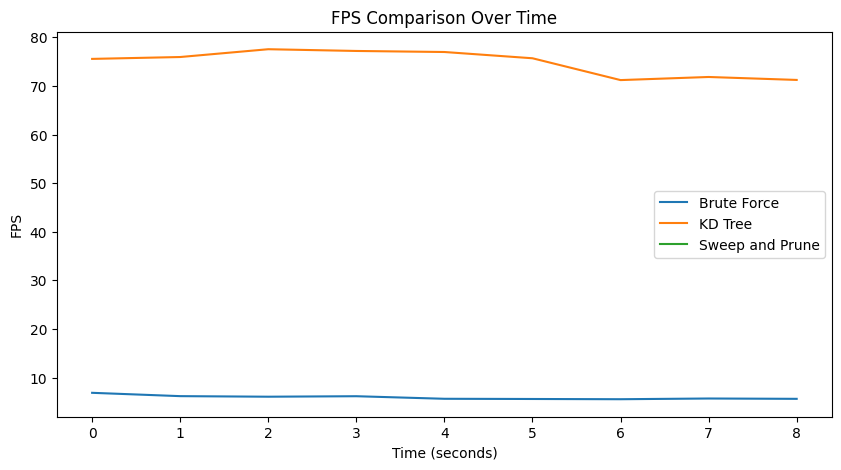


Memory Usage Results:
Brute Force: [272, 412, 464, 516, 568, 684, 736, 788, 840]
KD Tree: [146632, 146724, 146752, 146780, 146808, 146900, 146928, 146956, 146984]
Sweep and Prune: []


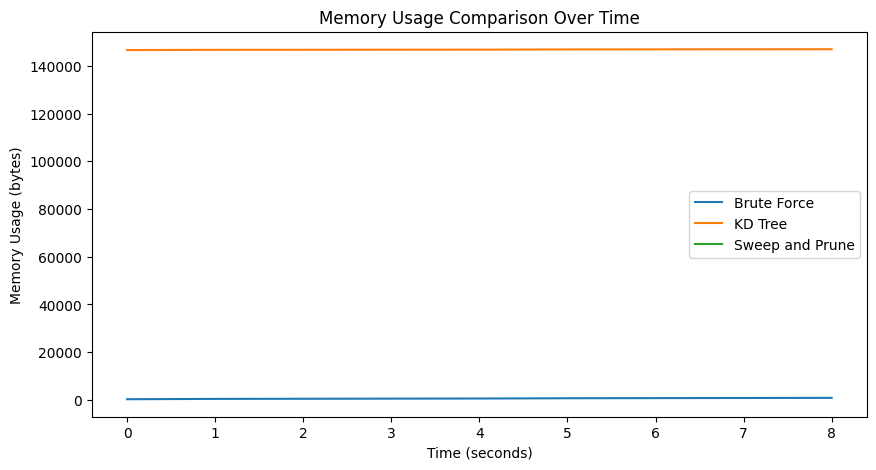

In [4]:
# Set these parameters before running the cell
particle_count = 500  # Example: 50 particles
duration = 10  # Example: 10 seconds
interval = 1   # Data collection interval in seconds

results = compare_algorithms(particle_count, duration, interval)

# Printing and Plotting FPS
print("FPS Results:")
plt.figure(figsize=(10, 5))
for name, data in results.items():
    print(f"{name}: {data['fps']}")
    plt.plot(data['fps'], label=name)
plt.title('FPS Comparison Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('FPS')
plt.legend()
plt.show()

# Printing and Plotting Memory Usage
print("\nMemory Usage Results:")
plt.figure(figsize=(10, 5))
for name, data in results.items():
    print(f"{name}: {data['memory']}")
    plt.plot(data['memory'], label=name)
plt.title('Memory Usage Comparison Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Usage (bytes)')
plt.legend()
plt.show()

In [8]:
particle_counts = [10, 100, 200, 500, 1000]
all_frame_times = {}

for particle_count in particle_counts:
    results = compare_algorithms(particle_count, duration, interval)
    all_frame_times[particle_count] = results

# Plot Computation Time for each particle count
for particle_count, results in all_frame_times.items():
    plt.figure(figsize=(10, 5))
    for name, data in results.items():
        plt.plot(data['frame_time'], label=f"{name} ({particle_count} particles)")
    plt.title(f'Computation Time Per Frame for {particle_count} Particles')
    plt.xlabel('Frame Number')
    plt.ylabel('Computation Time (seconds)')
    plt.legend()
    plt.show()

Error during execution of bruteForce: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
Error during execution of sweepAndPrune: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
Error during execution of bruteForce: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
Error during execution of kDTree: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'


KeyError: 'frame_time'

<Figure size 1000x500 with 0 Axes>